This file runs some initial comparisons and balance tests of the sample-restricted data with the full data; the analysis aims to check the usefulness of the sample restriction.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [36]:
leokas = ['ucr_leoka_monthly_1960_2020_dta/leoka_monthly_2017.dta',
          'ucr_leoka_monthly_1960_2020_dta/leoka_monthly_2016.dta',
          'ucr_leoka_monthly_1960_2020_dta/leoka_monthly_2015.dta',
          'ucr_leoka_monthly_1960_2020_dta/leoka_monthly_2014.dta',
          'ucr_leoka_monthly_1960_2020_dta/leoka_monthly_2013.dta']
leoka_17, leoka_16, leoka_15, leoka_14, leoka_13 = pd.read_stata(leokas[0]), pd.read_stata(leokas[1]), pd.read_stata(leokas[2]), pd.read_stata(leokas[3]), pd.read_stata(leokas[4])

dfs = [leoka_13, leoka_14, leoka_15, leoka_16, leoka_17]
dfs = [i.iloc[:,:-198] for i in dfs]

for j in dfs:
    print(j.shape)

(266424, 58)
(267972, 58)
(270288, 58)
(271740, 58)
(273408, 58)


In [3]:
df = pd.concat(dfs, ignore_index=True)
df.shape

(1349832, 58)

In [37]:
month_map = {'january': 1, 'february': 2, 'march': 3, 'april': 4, 'may': 5, 'june': 6, 'july': 7, 'august': 8, 'september': 9, 'october': 10, 'november': 11, 'december': 12}
df['month_code'] = df['month'].map(month_map) + (df['year'] - 2013)*12
df.head(10)

,ori,agency_name,state,state_abb,number_of_months_reported,year,month,date,ori9,fips_state_code,...,assaults_no_injury_knife,assaults_no_injury_oth_weap,assaults_no_injury_unarmed,assaults_no_injury_total,month_code,total_assaults,killed_indicator,pct_female_officers,pct_officers_civilians,pct_population_officers
0,AK00101,anchorage,alaska,AK,12,2013,january,2013-01-01,AK0010100,02,...,1,1,27,30,1,30,0,0.136628,0.281837,0.0016
1,AK00101,anchorage,alaska,AK,12,2013,february,2013-02-01,AK0010100,02,...,0,9,13,22,2,24,0,0.136628,0.281837,0.0016
2,AK00101,anchorage,alaska,AK,12,2013,march,2013-03-01,AK0010100,02,...,0,6,19,25,3,28,0,0.136628,0.281837,0.0016
3,AK00101,anchorage,alaska,AK,12,2013,april,2013-04-01,AK0010100,02,...,0,2,15,19,4,19,0,0.136628,0.281837,0.0016
4,AK00101,anchorage,alaska,AK,12,2013,may,2013-05-01,AK0010100,02,...,0,6,17,23,5,23,0,0.136628,0.281837,0.0016
5,AK00101,anchorage,alaska,AK,12,2013,june,2013-06-01,AK0010100,02,...,2,3,17,24,6,24,0,0.136628,0.281837,0.0016
6,AK00101,anchorage,alaska,AK,12,2013,july,2013-07-01,AK0010100,02,...,1,0,15,16,7,19,0,0.136628,0.281837,0.0016
7,AK00101,anchorage,alaska,AK,12,2013,august,2013-08-01,AK0010100,02,...,0,3,13,16,8,16,0,0.136628,0.281837,0.0016
8,AK00101,anchorage,alaska,AK,12,2013,september,2013-09-01,AK0010100,02,...,0,1,11,12,9,12,0,0.136628,0.281837,0.0016
9,AK00101,anchorage,alaska,AK,12,2013,october,2013-10-01,AK0010100,02,...,0,3,14,19,10,22,0,0.136628,0.281837,0.0016


In [51]:
#Histograms of population, and total killings by ORI
agg_df = df.groupby('ori').agg({'population': 'first', 
                                'total_assaults': 'sum',
                                'officers_killed_total': 'max'}).reset_index()

In [52]:
agg_df = agg_df.sort_values(by='population', ascending=False)
top_municipalities = agg_df.head(100)

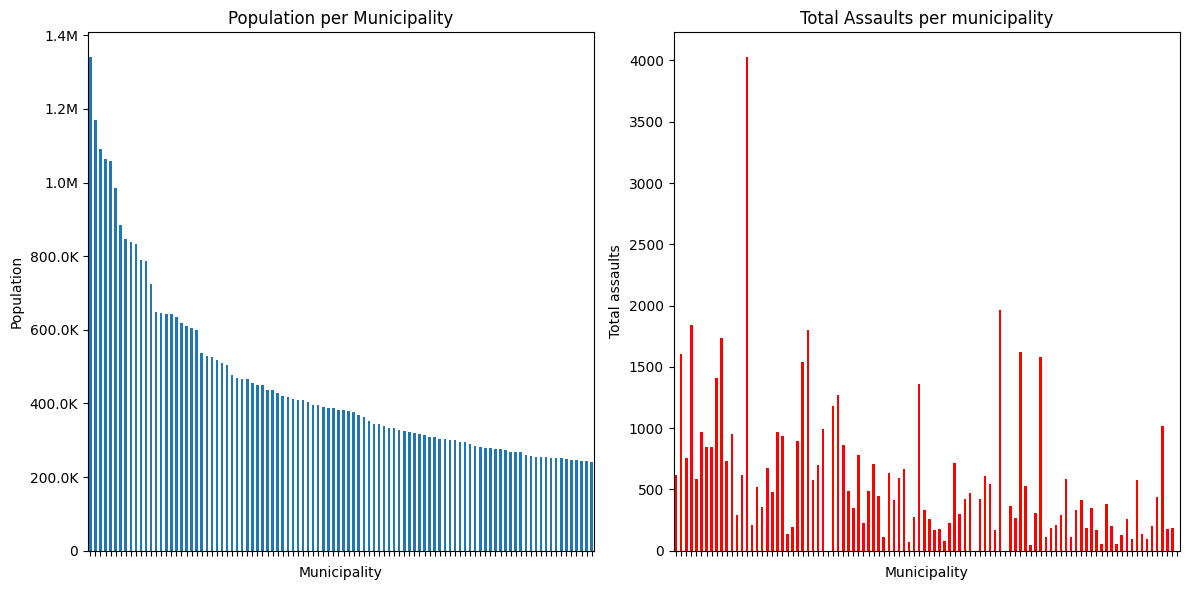

In [66]:
from matplotlib.ticker import FuncFormatter

def millions_formatter(x, pos):
    'The two args are the value and tick position'
    if x >= 1e6:  # Millions
        return f'{x*1e-6:.1f}M'
    elif x >= 1e3:  # Thousands
        return f'{x*1e-3:.1f}K'
    return int(x)

formatter = FuncFormatter(millions_formatter)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

#Population histogram
top_municipalities.plot(kind='bar', x='ori', y='population', ax=ax1, legend=False)
ax1.set_title('Population per Municipality')
ax1.set_xlabel('Municipality')
ax1.set_xticklabels([])
ax1.set_ylabel('Population')
ax1.yaxis.set_major_formatter(formatter)

#Officers assaulted histogram
top_municipalities.plot(kind='bar', x='ori', y='total_assaults', ax=ax2, color='red', legend=False)
ax2.set_title('Total Assaults per municipality')
ax2.set_xlabel('Municipality')
ax2.set_xticklabels([])
ax2.set_ylabel('Total assaults')

plt.tight_layout()
plt.show()

In [70]:
#first drop cities with largest population
top_10_pops = sorted(df.population.unique(), reverse=True)[:10]
df = df[~df['population'].isin(top_10_pops)]
df.shape

(1334028, 64)

In [ ]:
#start by making a dataset of treated municipalities for balance calculation
df['total_assaults'] = df['assaults_no_injury_total'] + df['assaults_with_injury_total']
officer_assaulted = (df['total_assaults'] > 0)
df['killed_indicator'] = np.where(df['officers_killed_total'] > 0, 1, 0)
officer_killed = (df['killed_indicator'] == 1)

#making treated df
treated_oris = df.loc[officer_killed, 'ori'].unique()
treated_df = df[df['ori'].isin(treated_oris)]
treated_df.shape

In [29]:
df = df[df['ori'].isin(treated_oris) == False]
df.shape

(1334148, 64)

In [30]:
#filter df further into a sample restricted df 
ori_to_keep = df.loc[officer_assaulted, 'ori'].unique()
sr_df = df[df['ori'].isin(ori_to_keep)]
treated_df.shape, sr_df.shape, df.shape, #df is untreated things, treated is anything with a killing, sr_df is sample-restricted? anything with a killing or attempted killing

((0, 64), (518592, 64), (1334148, 64))

In [ ]:
#generate a couple of other variables of interest
for i in [sr_df, treated_df, df]:
    i['pct_female_officers'] = np.where(i['total_employees_officers'] > 0, i['female_employees_officers']/i['total_employees_officers'], 0)
    i['pct_officers_civilians'] = np.where(i['total_employees_total'] > 0, i['total_employees_civilians']/i['total_employees_total'], 0)
    i['pct_population_officers'] = np.where(i['population'] > 0, i['total_employees_total']/i['population'], 0)

In [ ]:
#Now, we want to do various ttests of differences between treated_df and df; and treated_df and sr_df;
#total_emplyees_total, proportion female, proportion civilian, all the assault types

t_stat, p_value = ttest_ind(treated_df['assaults_with_injury_knife'], df['assaults_with_injury_knife'])
t_stat, p_value

t2, p2 = ttest_ind(treated_df['assaults_with_injury_knife'], sr_df['assaults_with_injury_knife'])
t2, p2

In [33]:
covariates = ['population', 'pct_female_officers', 'pct_officers_civilians', 'pct_population_officers', 'total_employees_total',
              'assaults_with_injury_knife', 'assaults_with_injury_oth_weap', 'assaults_with_injury_unarmed', 'assaults_with_injury_total', 'total_assaults']

In [ ]:
for c in covariates:
    m2, m3 = np.mean(df[c]), np.mean(sr_df[c])
    t_12, p_12 = ttest_ind(sr_df[c], df[c])
    #print(f'for {c}: overall balance means: {m1, m2} and t-stat: {t_12} and p-val: {p_12}')
    print(f'for {c}: restricted balance means: {m1, m3} and t-stat: {t_13} and p-val: {p_13}')